# Personal Loan Campaign Project

## Background

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).  

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.  

The aim is to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.  

The model would be optimised for precision, as we are looking for customers who have a higher probability of purchasing the loan.

## Data Dictionary

**ID**: Customer ID  
**Age**: Customer’s age in completed years  
**Experience**: Number of years of professional experience  
**Income**: Annual income of the customer (in thousand dollars)  
**ZIP Code**: Home Address ZIP code  
**Family**: the Family size of the customer  
**CCAvg**: Average spending on credit cards per month (in thousand dollars)  
**Education**: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional  
**Mortgage**: Value of house mortgage if any. (in thousand dollars)  
**Personal_Loan**: Did this customer accept the personal loan offered in the last campaign?  
**Securities_Account**: Does the customer have securities account with the bank?  
**CD_Account**: Does the customer have a certificate of deposit (CD) account with the bank?  
**Online**: Do customers use internet banking facilities?  
**CreditCard**: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Analysis and Prediction

### Import relevant libraries

In [3]:
import numpy as np # numerical computations
import pandas as pd # data processing

# for creating visualisations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.linear_model import LogisticRegression # builds the model
from sklearn.preprocessing import StandardScaler # data normalisation

# performance metrics computation
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve,
                             roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve)

### Load the data

In [143]:
data = pd.read_csv('Loan_Modelling.csv') # loading the data
df = data.copy() # making a copy of the data to preserve the integrity of the original one
df.head() # showing the first 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Exploratory Data Analysis

In [144]:
# checking thedimension of the data
df.shape

(5000, 14)

- There are 5000 rows and 14 columns.  

- The ID and ZIPCode columns are not relevant to this analysis and so would be dropped 

In [145]:
# dropping the "ID" column
df.drop('ID', axis=1, inplace=True)

In [146]:
# quality check
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [147]:
# checking for null values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no null values in the dataset

In [148]:
# checking for duplicated values
df.duplicated().sum()

0

- There are no diplicated values in the dataset

In [149]:
# summary information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


- All variables are numerical.  
- Aside from "CCAvg" which is a float, the rest of the variables are of integer data type.

In [150]:
# statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


- Most customers are between 35 - 55 years
- Most customers have between 10 - 30 years of experience
- Most customers earn between 39 - 98 thousand dollars per annum
- Most customers spend between 700 - 2500 dollars per month

### Univariate Analysis

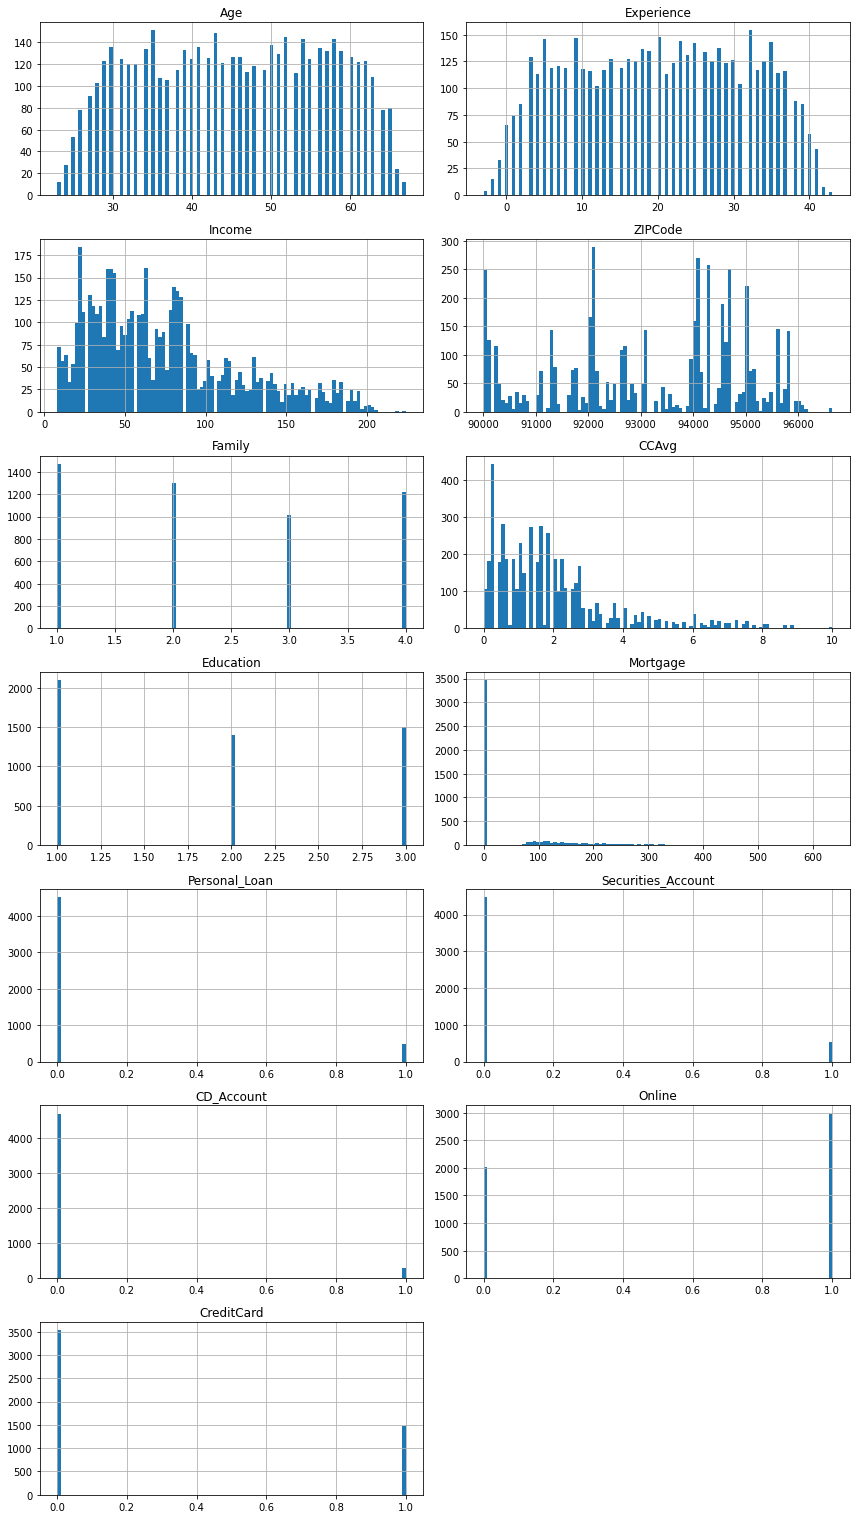

In [151]:
# plotting histograms of all the columns
df.hist(stacked = False, bins = 100, figsize = (12, 30), layout = (10, 2))
plt.tight_layout();

- The age and experience distributions are approximately normal. Their means are close to their medians
- The income distribution is right skewed. Most customers earn between 30 - 90 thousand dollars per annum
- The mode family members for customers is 1, followed by 2
- Average spending on credit cards is right-skewed. Most customers spend between a thousand to 3000 dollars per month
- The mode education level is Undergrad
- Most customers have no mortgage
- Most customers did not accept the personal loan offered in the last campaign
- Most customers do not have securities account with the bank
- Most customers do not have a certificate of deposit account with the bank
- Most customers use the online banking facilities, but a good number of customers do not
- Most customers do not use a credit card issued by any other bank.

### Bivariate analysis

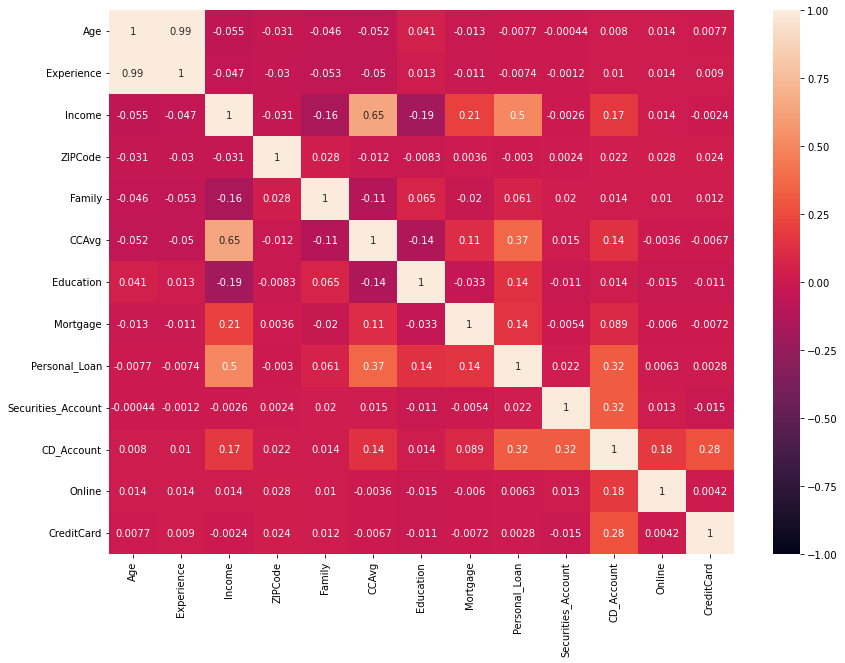

In [152]:
# plotting a heat map to show correlation between the variables
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)
plt.show()

- Age is highly correlated with experience. This means that as age increases, experience years increases
- Income shows a moderate correlation with average spending on credit cards. This makes sense because the more one earns, the higher the purchasing power of the individual
- There is a moderate correlation between Personal Loan and Income. It seems to be the case that customers who earn more are possibly more likely to take up the loan.
- There is a low correlation between customers who have a certificate of deposit account and customers who have a securities account and customers who took up the personal loan. There is a slight possibility that customers who took up the personal loan are customers who have various accounts with the bank. This could be a show of comfort and trust in the bank's products and services.

#### Converting Education to category data type

In [153]:
# converting Education to categorical datatype
df['Education'] = df['Education'].astype('category')

In [154]:
# quality check
df['Education'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

### Building the model

I would be dropping the following columns:
- Experience: It is highly correlated with the Age column and it has a lower correlation to the target variable (Personal_Loan)
- ZIPCode: It has no relevance to the analysis. All zipcodes are for a single state in the USA (California).

#### Feature Selection

In [155]:
# feature selection
X = df.drop(['Personal_Loan', 'Experience', 'ZIPCode'], axis=1)
y = df['Personal_Loan']

In [156]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


In [157]:
# checking the distribution of the target variable
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [158]:
y.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- The target contains 90.4% of the 0 class and 9.6% of the target class (1)

#### Splitting the data

In [159]:
# splitting the data. Using 80/20 for training and test
from sklearn.model_selection import train_test_split

# split data into train_validation and test data
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# splitting the train_validation data into training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_val, 
                                                  y_train_val, 
                                                  test_size=0.2, 
                                                  random_state=0, 
                                                  stratify=y_train_val)

#### Scaling the data

In [160]:
# creating an instance of the scaler
scaler = StandardScaler()

# scaling the data
x_train_sc = scaler.fit_transform(x_train)
x_val_sc = scaler.transform(x_val)
x_test_sc = scaler.transform(x_test)

### Logistic regression

In [161]:
# creating an instance of the logistic regression classifier
lr = LogisticRegression(random_state=0)
lr

LogisticRegression(random_state=0)

#### Training and Evaluation Pipelines

In [162]:
# function to train a model and compute train accuracy
def train(model, X, y):
    """Function to train a model and compute accuracy
    Args:
        model: untrained model 
        X: train features
        y: train target
    Returns:
        trained_model: The trained model
    """
    trained_model = model.fit(X, y) # training the model
    preds = trained_model.predict(X) # making a prediction
    accuracy = accuracy_score(y, preds) # calculating accuracy
    print(f"Train Accuracy: {accuracy}") # printing the accuracy score
    return trained_model # returning the trained model

In [163]:
# function to evaluate the model and compute metrics on validation data
def evaluate_model(trained_model, X, y, threshold = 0.5): 
    """Function to evaluate the trained model with different metrics
    Args:
        trained_model: a trained model (classifier)
        X: validation data (features)/test data
        y: target in validation data
        threshold: value to filter predictions
    """
    
    # predicting probability
    pred_proba = trained_model.predict_proba(X)[:, 1] # selecting the 1 class from the matrix
    pred_class = np.round(pred_proba > threshold) # convert probability to 0 or 1 class
    acc = accuracy_score(y, pred_class) # calculating accuracy on the validation data
    recall = recall_score(y, pred_class) # getting the recall
    precision = precision_score(y, pred_class) # getting the precision
    f1 = f1_score(y, pred_class) # getting the f1 score of the model
    
    # creating a dataframe with the result of all the metrics. Index [0] sets an index for the dataframe
    df = pd.DataFrame({
        "Accuracy": acc,
        "precision": precision,
        "Recall": recall,
        "F1": f1
        
    }, index = [0])
    
    # computing the confusion matrix
    conf = confusion_matrix(y, pred_class, labels = [0, 1]) # target, predicted values, and labels 
    disp = ConfusionMatrixDisplay(conf, display_labels=[0, 1]) # setting the display for the confusion matrix
    disp.plot() # plotting the confusion matrix
    plt.show() # showing the confusion matrix
    
    return df # returns the dataframe of the calculated metrics

In [164]:
# training the model
lr_model = train(lr, x_train_sc, y_train)

Train Accuracy: 0.9525


The model has a training accuracy of 95%. This means that the model will correctly classify the data 95% of the time, assuming the model is fed new data similar to the one used to train it.

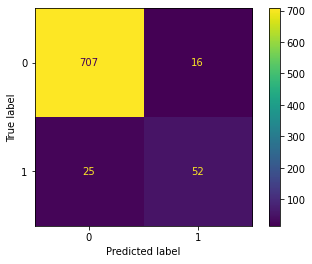

,Accuracy,precision,Recall,F1
0,0.94875,0.764706,0.675325,0.717241


In [165]:
# evaluating the model
lr_df = evaluate_model(lr_model, x_val_sc, y_val)
lr_df

**Explaining the Confusion Matrix**
- The True Positive is 52 which is the total number of correct predictions for the 1 class (Personal Loan uptake). Out of 77 people in the validation data who collected the loan, the model correctly classified 52 of them. 
- The True Negative is 707. Out of 723 people in the validation data that did not collect the loan, the model correctly classified 707 of them.
- The False Positive is 16 which is the total number of incorrect predictions in the 1 class (Personal Loan uptake). Out of 723 people in the validation data who did not collect the loan, the model is incorrectly predicting that 16 of them collected the loan.
- The False Negative is 25. Out of 77 people in the validation data that collected the loan, the model is incorrectly predicting that 25 of them did not collect the loan.
- The actual positives are 77 (25 + 52)
- The actual negatives are 723 (707 + 16)

**Model performance**
- The validation accuracy is approximately 95%, very close to the training accuracy. This shows that the model generalizes well.
- The precision is 76%. This means that the model correctly classified 76% of the predicted values.
- The recall is approximately 68%, which means that the model correctly classified 68% of the target class in the data.
- The f1 score is approximately 72%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

#### Coefficients

In [166]:
# getting the columns (variables) in the data
variables = X.columns
variables

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [167]:
# getting the coefficients that correspond to the variables in the data
coef_list = lr_model.coef_[0]
coef_list

array([ 0.06907303,  2.38952111,  0.74066319,  0.21537353,  1.41105535,
       -0.01419228, -0.26184436,  0.90167481, -0.33009173, -0.47428161])

- The values above correspond to the log odds (logit). I would be computing the odds for better explainability of the values

In [168]:
# function to compute the odds
def compute_odds(var, coeff):
    """Function to compute the percentage change in the odds
    Args:
        var: an independent variable
        coeff: the corresponding coefficient of the variable
    Returns: a dictionary showing the percentage change for each variable
    """
    odds = {i: '{:.1f}%'.format((np.exp(j) - 1) * 100, 1) for i, j in zip(var, coeff)}
    return odds

compute_odds(variables, coef_list)

{'Age': '7.2%',
 'Income': '990.8%',
 'Family': '109.7%',
 'CCAvg': '24.0%',
 'Education': '310.0%',
 'Mortgage': '-1.4%',
 'Securities_Account': '-23.0%',
 'CD_Account': '146.4%',
 'Online': '-28.1%',
 'CreditCard': '-37.8%'}

- Taking the Age variable as an example, a one unit increase in age, assuming other variables remain constant, results in a 7.2% increase in the odds of a customer taking the loan.  
- For the Mortgage variable, a one unit increase in the Mortgage value, assuming other variables remain constant, results in a 1.4% decrease in the odds of a customer taking the loan.
- Taking the Online banking variable as an example, a one unit increase in the Online variable value (i.e changing from True to False and vice versa), assuming all other variables remain constant, results in a 28.1% decrease in the odds of a customer taking the loan.

#### Logistic regression model optimisation

In order to correctly classify customers who will most likely be taking the personal loan, the model would be optimised for precision. This is also a better metric to optimise for than accuracy as the dataset is very imbalanced.

- I would be using the C value to optimise the model 
- I would also be increasing the threshold

#### C value

In [169]:
np.random.seed(0) # setting a seed
c_values = np.random.rand(5, 2).flatten() # getting random values for C

accuracy_list = [] # creating an empty list for the accuracy values

for c in c_values:
    model = LogisticRegression(C = c) # creating an instance of the model with each C value
    model.fit(x_train_sc, y_train) # building the model
    acc = model.score(x_test_sc, y_test) # getting the accuracy
    accuracy_list.append(acc) # appending the accuracy scores to the acc_list
    
c_values

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152])

In [170]:
# accuracy list
accuracy_list

[0.955, 0.954, 0.954, 0.955, 0.955, 0.954, 0.955, 0.954, 0.954, 0.956]

In [171]:
# getting the optimal c index from the index of the maximum accuracy value
opt_c_indx = np.argmax(accuracy_list)

opt_c = c_values[opt_c_indx] # getting the optimal c value using the optimal c index
opt_c

0.3834415188257777

Train Accuracy: 0.9528125


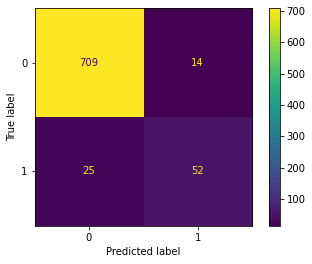

,Accuracy,precision,Recall,F1
0,0.95125,0.787879,0.675325,0.727273


In [172]:
lr_c = LogisticRegression(random_state=0, C = opt_c) # creating an instance of the model

lr_c_model = train(lr_c, x_train_sc, y_train) # training the model

df_c = evaluate_model(lr_c_model, x_val_sc, y_val)
df_c

**Model performance**
- The validation accuracy is approximately 95%, very close to the training accuracy. This shows that the model generalizes well.
- The precision has increased to approximately 79% from 76%. This means that the model correctly classified 79% of the predicted values.
- The recall is approximately 68%, which means that the model correctly classified 68% of the target class in the data.
- The f1 score increases slightly to approximately 73%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

#### Threshold

Train Accuracy: 0.9525


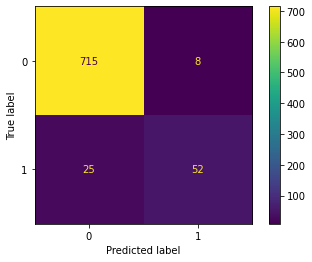

,Accuracy,precision,Recall,F1
0,0.95875,0.866667,0.675325,0.759124


In [173]:
lr_thre = LogisticRegression(random_state=0) # creating an instance of the model

lr_thre_model = train(lr_thre, x_train_sc, y_train) # training the model

df_thre = evaluate_model(lr_thre_model, x_val_sc, y_val, threshold=0.57)
df_thre

Increasing the threshold slighly resulted in a higher precision and overall better metrics for the logistic regression model.  

**Model performance**
- The validation accuracy increases to approximately 96%, very close to the training accuracy. This shows that the model generalizes well.
- The precision has increased to approximately 87%. This means that the model correctly classified 87% of the predicted values.
- The recall is approximately 68%, which means that the model correctly classified 68% of the target class in the data.
- The f1 score iincreases to approximately 76%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

#### Applying the test data to the model

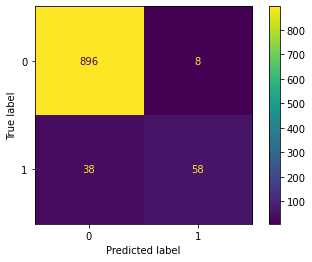

,Accuracy,precision,Recall,F1
0,0.954,0.878788,0.604167,0.716049


In [174]:
df_thre_test = evaluate_model(lr_thre_model, x_test_sc, y_test, threshold=0.57)
df_thre_test

- The test accuracy is similar at 95%, precision increased to 88%, recall reduced to 60% and f1 reduced to 72%

### Decision Tree

- The Decision Tree model would be built using the data which has not been scaled. This is because Decision Tree does compute the distance between the variables and the target and also does not compute the magnitude of the variables.
- I would also be including the Experience and ZipCode variables in the training data as Decision Tree does not require feature selection because it selects the best features using Gini or Information Gain.

In [175]:
df['ZIPCode'] = df['ZIPCode'].astype('category')
df['ZIPCode'].dtype

CategoricalDtype(categories=[90005, 90007, 90009, 90011, 90016, 90018, 90019, 90024,
                  90025, 90027,
                  ...
                  95973, 96001, 96003, 96008, 96064, 96091, 96094, 96145,
                  96150, 96651],
, ordered=False)

In [176]:
# Feature selection
X2 = df.drop('Personal_Loan', axis = 1)
y2 = df['Personal_Loan']

In [177]:
# split data into train, validation and test data
x2_train_val, x2_test, y2_train_val, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0, stratify=y2)

In [178]:
# splitting the data into train and validation data
x2_train, x2_val, y2_train, y2_val = train_test_split(x2_train_val, y2_train_val, test_size=0.2, random_state=0, 
                                                      stratify=y2_train_val)

In [179]:
from sklearn.tree import DecisionTreeClassifier # builds the model
from sklearn import tree # plots the decision tree

# declaring an instance of the model
dtree = DecisionTreeClassifier(random_state=0)

In [180]:
# training the model
dtree_model = train(dtree, x2_train, y2_train)

Train Accuracy: 1.0


A training accuracy of 1 shows overfitting of the model. Some optimisation techniques would be applied to ensure the model generalizes well to new data

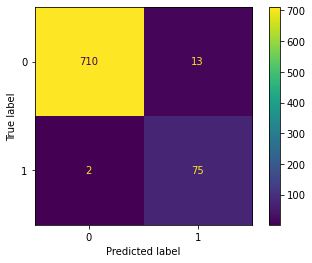

,Accuracy,precision,Recall,F1
0,0.98125,0.852273,0.974026,0.909091


In [181]:
# evaluating the model
dtree_metrics_df = evaluate_model(dtree, x2_val, y2_val)
dtree_metrics_df

**Explaining the Confusion Matrix**
- The True Positive is 75 which is the total number of correct predictions for the 1 class (Personal Loan uptake). Out of 77 people in the validation data who collected the loan, the model correctly classified 75 of them. 
- The True Negative is 710. Out of 723 people in the validation data that did not collect the loan, the model correctly classified 710 of them.
- The False Positive is 13 which is the total number of incorrect predictions in the 1 class (Personal Loan uptake). Out of 723 people in the validation data who did not collect the loan, the model is incorrectly predicting that 13 of them collected the loan.
- The False Negative is 2. Out of 77 people in the validation data that collected the loan, the model is incorrectly predicting that 2 of them did not collect the loan.
- The actual positives are 77 (2 + 75)
- The actual negatives are 723 (710 + 13)

**Model performance**
- The validation accuracy is approximately 98%, very close to the training accuracy. This shows that the model generalizes well.
- The precision is 85%. This means that the model correctly classified 85% of the predicted values.
- The recall is 97%, which means that the model correctly classified 97% of the target class in the data.
- The f1 score is approximately 91%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

In [182]:
# plotting the tree 

# first we get the feature names
feat_names = list(X2.columns)

# then we plot
# class names labels the classes
# filled adds colour to the nodes
# node_ids numbers the nodes 
def plot_decision_tree(dt_model):
    """Function to plot a Decision Tree model
    Args:
        dt_model: the trained Decision Tree model    
    """
    plt.figure(figsize = (20, 30))
    tree.plot_tree(dtree_model, feature_names=feat_names, class_names=True, filled=True, node_ids=True, fontsize=15)
    
    plt.show()

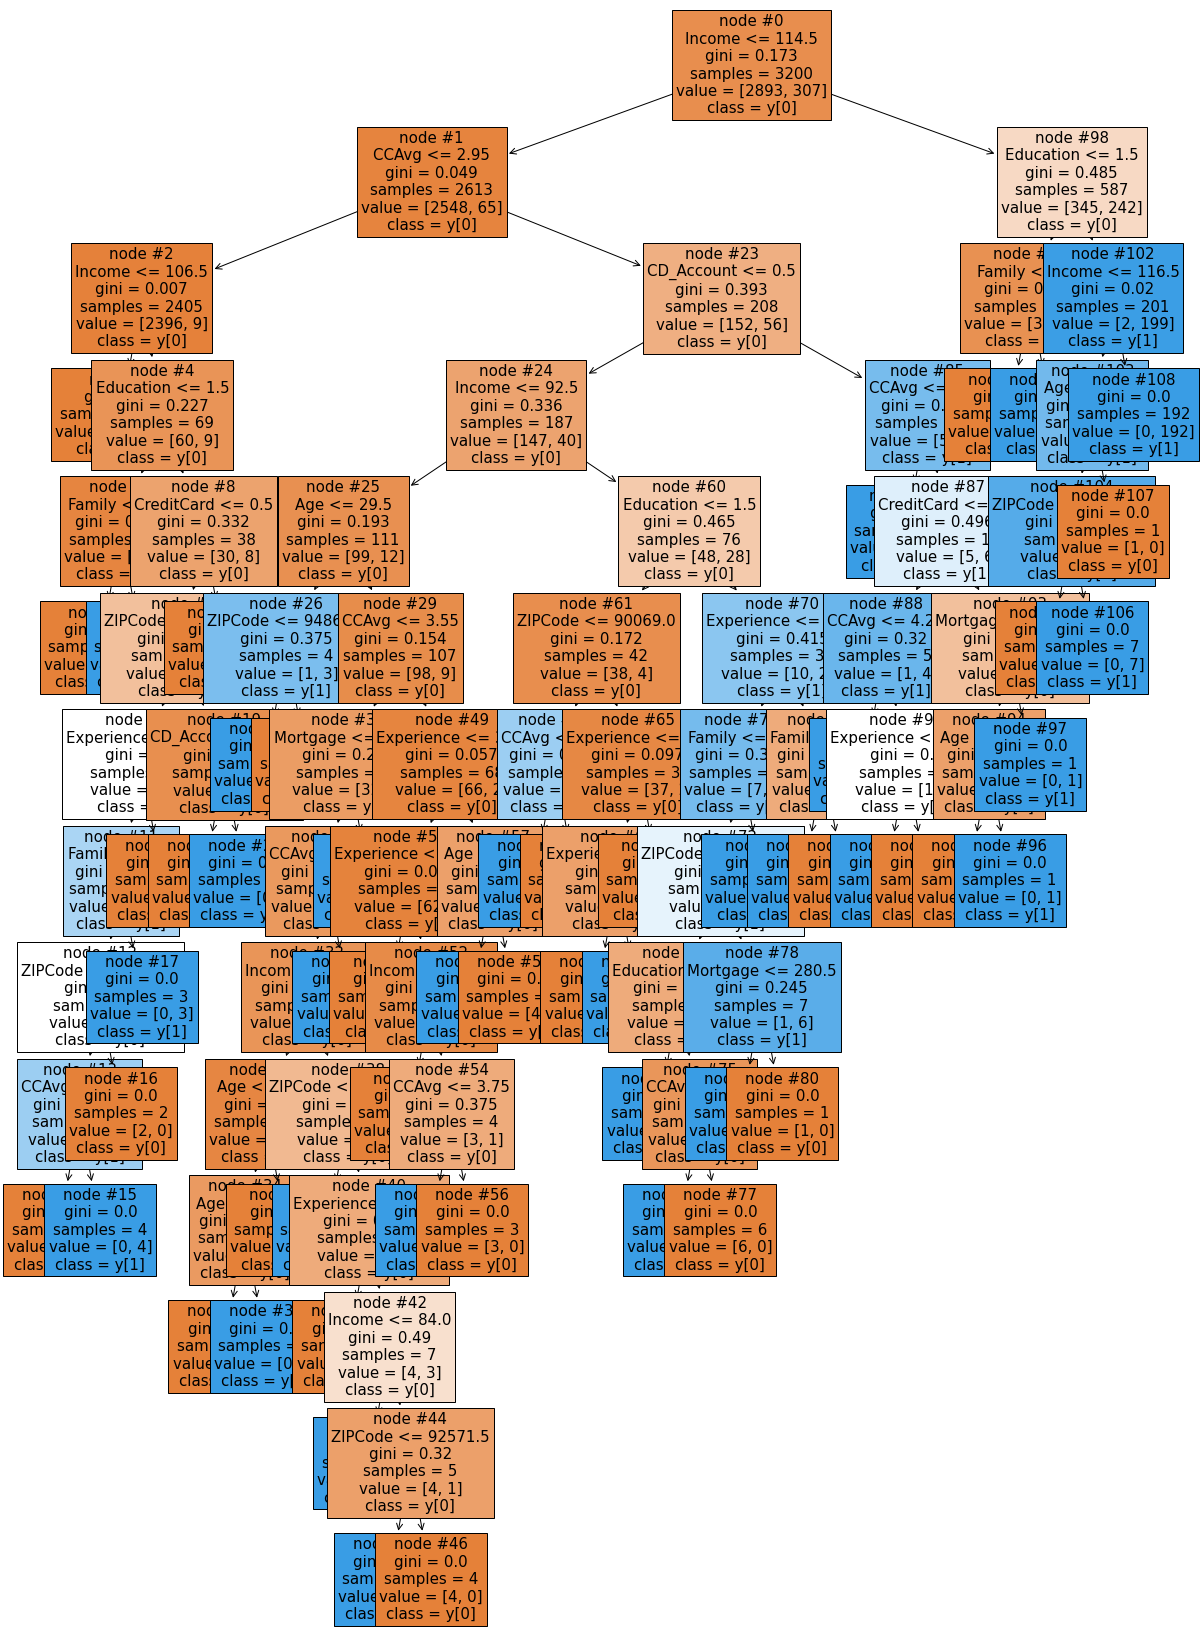

In [183]:
plot_decision_tree(dtree_model)

In [184]:
# important features to the target
importances = dtree_model.feature_importances_
importances

array([0.01782976, 0.01816793, 0.28191151, 0.02513218, 0.15170889,
       0.07122974, 0.39717028, 0.00749939, 0.        , 0.02367058,
       0.        , 0.00567974])

In [185]:
# plotting the importance
def plot_importance(importance_vals):
    """Function to plot importances
    Args:
        importance_vals: values of the important features
    """
    # this sorts the importances in ascending order and gives the index
    # we will use the index to find out the feature that corresponds to these values
    indices = np.argsort(importance_vals)

    plt.figure(figsize=(10, 8)) # setting the figure size
    plt.title("Feature Importances") # setting the title
    plt.barh(range(len(indices)), importance_vals[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    plt.show()

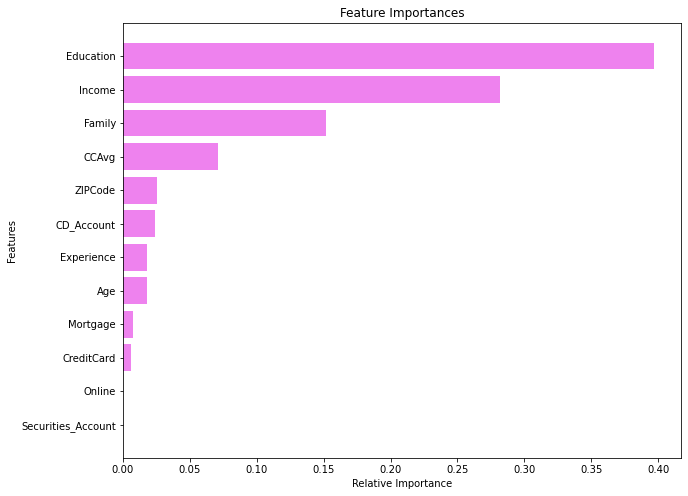

In [186]:
plot_importance(importances)

- These are the values important to the model. It is important to know that this is better calculated after pre-pruning the model otherwise they variables may be incorrect.

#### Decision Tree model optimisation

Model optimisation using class weight and max_depth.

In [187]:
# building another model and tuning the class_weight hyperparameter with the 0 class (majority class) assigned 9.6%
# and the minority class (1 class) assigned 90.4%
dtree2 = DecisionTreeClassifier(random_state=0, class_weight={0: 0.096, 1:0.904}, max_depth = 4)

dtree2_model = train(dtree2, x2_train, y2_train) # training the model

Train Accuracy: 0.9509375


- The accuracy has been reduced to 95% after application of class weight and preprunning with max_depth.

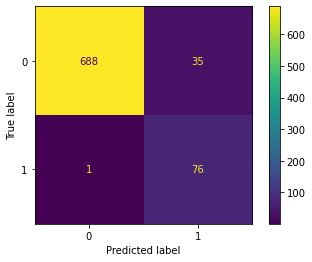

,Accuracy,precision,Recall,F1
0,0.955,0.684685,0.987013,0.808511


In [188]:
# evaluating the model
dtree2_metrics_df = evaluate_model(dtree2_model, x2_val, y2_val)
dtree2_metrics_df

**Model performance**
- The validation accuracy is approximately 96% which is close to the training accuracy. This means that the model generalizes well.
- The precision reduced to 68%. This means that the model correctly classified 68% of the predicted values.
- The recall is approximately 99%, which means that the model correctly classified 99% of the target class in the data.
- The f1 score is approximately 81%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

#### Optimisation using threshold to improve precision
- Threshold would be increased in order to improve the precision

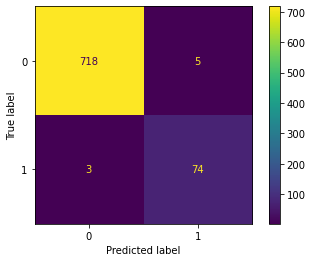

,Accuracy,precision,Recall,F1
0,0.99,0.936709,0.961039,0.948718


In [189]:
# evaluating the model
dtree2_metrics_df = evaluate_model(dtree2_model, x2_val, y2_val, threshold=0.63)
dtree2_metrics_df

- Increasing the threshold gives a better performing model all round

**Model performance**
- The validation accuracy is 99%. The model may not generalise as well.
- The precision increased to 94%. This means that the model correctly classified 94% of the predicted values.
- The recall is 96%, which means that the model correctly classified 96% of the target class in the data.
- The f1 score is approximately 95%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

#### Applying the model to the test data

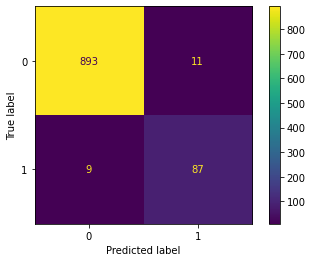

,Accuracy,precision,Recall,F1
0,0.98,0.887755,0.90625,0.896907


In [190]:
dtree2_metrics_test = evaluate_model(dtree2_model, x2_test, y2_test, threshold=0.63)
dtree2_metrics_test

Accuracy reduced by 1% to 98%, precision reduced 89%, recall reduced to 91% and f1 reduced to 90%

#### Importances after pruning

In [191]:
# important features to the target
importances2 = dtree2_model.feature_importances_
importances2

array([0.00000000e+00, 0.00000000e+00, 6.65242865e-01, 0.00000000e+00,
       1.34718329e-01, 9.87544998e-02, 9.72642620e-02, 0.00000000e+00,
       0.00000000e+00, 4.02004420e-03, 3.10700618e-15, 0.00000000e+00])

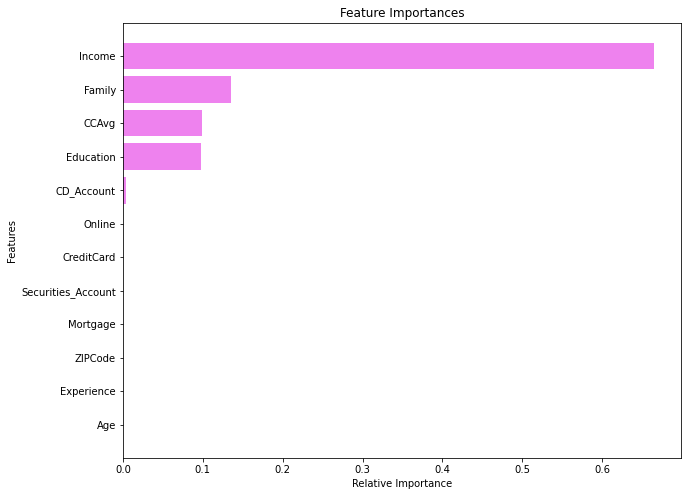

In [192]:
plot_importance(importances2)

After pre-pruning, the important values are Income, Family, CCAvg, Education and CD_Account

In [193]:
# importances
importances

# getting the features
feature_names = X2.columns

# Combining the importance values and variable names into a dataframe
feature_importances_df = pd.DataFrame({'feature_names': feature_names, 'importances': importances2})

# Sort the dataframe by importance values in descending order
feature_importances_df = feature_importances_df.sort_values('importances', ascending=False)

# Print the dataframe to view the feature importance values and corresponding variable names
feature_importances_df

,feature_names,importances
2,Income,6.652429e-01
4,Family,1.347183e-01
5,CCAvg,9.875450e-02
6,Education,9.726426e-02
9,CD_Account,4.020044e-03
10,Online,3.107006e-15
0,Age,0.000000e+00
1,Experience,0.000000e+00
3,ZIPCode,0.000000e+00
7,Mortgage,0.000000e+00


- Only six features contributed to the model: Income, Family, CCAvg, Education, CD_Account and Online

### Random Forest

In [194]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=4)

# train the model
rf_model = train(rf, x2_train, y2_train)
rf_model

Train Accuracy: 0.9628125


RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=0)

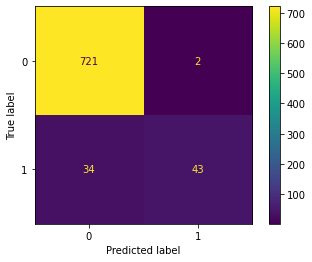

,Accuracy,precision,Recall,F1
0,0.955,0.955556,0.558442,0.704918


In [195]:
rf_df = evaluate_model(rf_model, x2_val, y2_val)
rf_df

**Model performance**
- The validation accuracy is approximately 96%, same as the training accuracy. Thi smeans that the model would generalise well when fed new data.
- The precision is 96%. This means that the model correctly classified 96% of the predicted values.
- The recall is 55%, which means that the model correctly classified 55% of the target class in the data.
- The f1 score is approximately 70%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

The Random Forest model gives a better performance for the accuracy.

In [196]:
# important features to the target
importances_rf = rf_model.feature_importances_
importances_rf

array([0.00940695, 0.00924784, 0.35211916, 0.01033756, 0.06946815,
       0.21188554, 0.16632502, 0.04298347, 0.00254288, 0.11840173,
       0.00162401, 0.0056577 ])

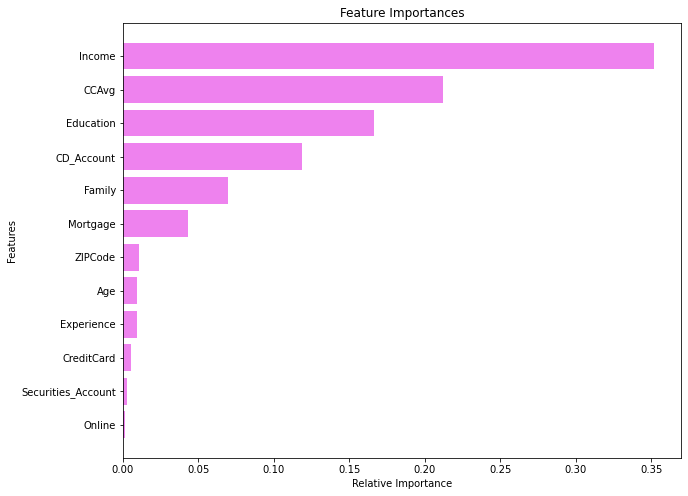

In [197]:
plot_importance(importances_rf)

#### Hyperparameter tuning on Random Forest - Grid search

In [198]:
# import the grid search estimator
from sklearn.model_selection import GridSearchCV


# specifying the hyperparameters
param_grid = {'n_estimators': [100, 110, 120, 130, 140], 'max_depth': [2, 3, 4, 5, 6]}

# instantiate the classifier
rf2 = RandomForestClassifier(random_state=0)
grid = GridSearchCV(rf2, param_grid, cv = 5, n_jobs = -1, scoring = "precision")


# fit the grid search model on the training set
grid.fit(x2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 110, 120, 130, 140]},
             scoring='precision')

In [199]:
# checking the best hyperparameters
best_params = grid.best_params_
best_params

{'max_depth': 2, 'n_estimators': 100}

In [200]:
# getting the best precision score
grid.best_score_

1.0

Rebuilding the model with max_depth of 2 and number of estimators of 100

In [201]:
# rebuilding the Gradient Boosting algorithm with the best parameters
rf_gs = RandomForestClassifier(**best_params, random_state=0)
rf_gs

RandomForestClassifier(max_depth=2, random_state=0)

In [202]:
# retraining the model
rf_gs_model = train(rf_gs, x2_train, y2_train)

Train Accuracy: 0.9159375


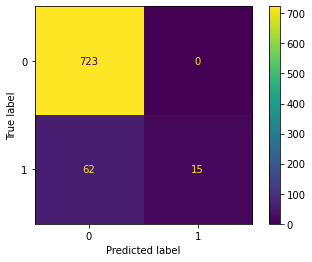

,Accuracy,precision,Recall,F1
0,0.9225,1.0,0.194805,0.326087


In [203]:
rf_gs_df = evaluate_model(rf_gs_model, x2_val, y2_val)
rf_gs_df

- The training accuracy is approximately 92% and the validation accuracy is 92%. This means that the model is not overfitting and generalises well.
- The model has achieved a precision of 100% which is the goal. This means that the model correctly classified 100% of the predicted values. 
- This however comes at the expense of the recall which is approximately 19.5%. This means that the model only correctly classified 19.5% of the positive class in the entire validation data.
- Therefore, for a precision of 100% using the Random Forest model with optimal hyperparameters, recall would drop to 19.5% and F1 would drop to 32.6%

#### Applying the model to the test data

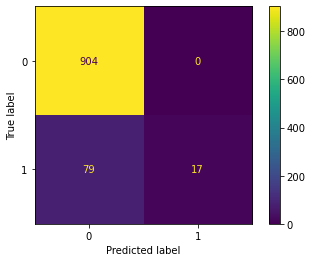

,Accuracy,precision,Recall,F1
0,0.921,1.0,0.177083,0.300885


In [204]:
rf_gs_test = evaluate_model(rf_gs_model, x2_test, y2_test)
rf_gs_test

- The precision remained constant same as the accuracy. The recall and f1 values decreased slightly.

### Gradient Boosting

In [205]:
# import the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier
gb = GradientBoostingClassifier(random_state=0)

# train the model
gb_model = train(gb, x2_train, y2_train)

Train Accuracy: 0.995625


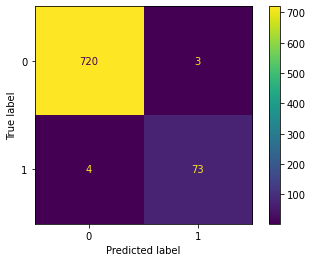

,Accuracy,precision,Recall,F1
0,0.99125,0.960526,0.948052,0.954248


In [206]:
gb_df = evaluate_model(gb_model, x2_val, y2_val)
gb_df

**Model performance**
- The validation accuracy is approximately 99%, close to the training accuracy. This means that the model would generalise well when fed new data.
- The precision is 96%. This means that the model correctly classified 96% of the predicted values.
- The recall is approximately 95%, which means that the model correctly classified 95% of the target class in the data.
- The f1 score is 95%. It combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

The Gradient Boosting model gives a better performance so far for all models.

In [207]:
# important features to the target
importances_gb = gb_model.feature_importances_
importances_gb

array([7.69807293e-03, 3.43012748e-03, 3.85029454e-01, 3.81824184e-03,
       1.47126276e-01, 7.58925126e-02, 3.52505980e-01, 2.66726902e-03,
       1.04978609e-04, 2.04122039e-02, 3.35235186e-04, 9.79648611e-04])

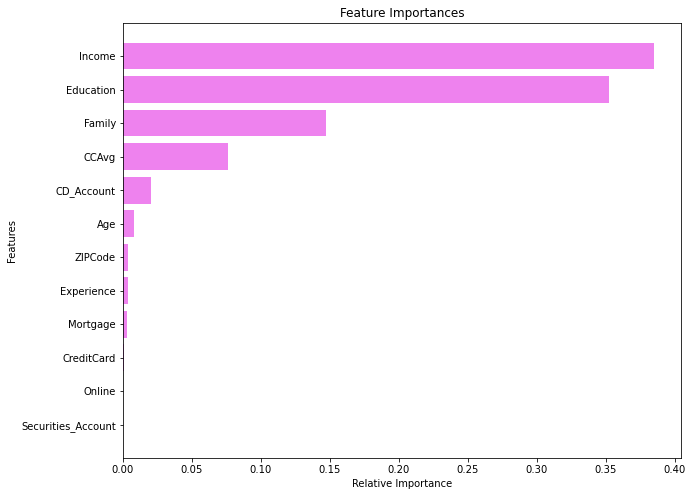

In [208]:
plot_importance(importances_gb)

#### Hyperparameter tuning on Gradient boosting - Grid search

In [209]:
# specifying the hyperparameters
param_grid2 = {'learning_rate': [0.01, 0.1, 1, 10, 10.10], 'max_depth': [2, 3, 4, 5, 6]}

# instantiate the classifier
gb2 = GradientBoostingClassifier(random_state=0)
grid2 = GridSearchCV(gb2, param_grid2, cv = 5, n_jobs = -1, scoring = "precision")


# fit the grid search model on the training set
grid2.fit(x2_train, y2_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 10.1],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring='precision')

In [210]:
# checking the best hyperparameters
best_params_gb = grid2.best_params_
best_params_gb

{'learning_rate': 0.01, 'max_depth': 2}

In [211]:
# getting the best precision score
grid2.best_score_

1.0

Rebuilding the model with learning rate of 0.01 and max_depth of 2

In [212]:
# rebuilding the Gradient Boosting algorithm with the best parameters
gb_gs = GradientBoostingClassifier(**best_params_gb, random_state=0)
gb_gs

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)

In [213]:
# retraining the model
gb_gs_model = train(gb_gs, x2_train, y2_train)

Train Accuracy: 0.9646875


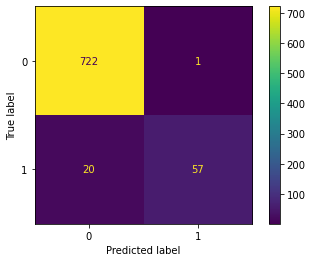

,Accuracy,precision,Recall,F1
0,0.97375,0.982759,0.74026,0.844444


In [214]:
gb_gs_df = evaluate_model(gb_gs_model, x2_val, y2_val)
gb_gs_df

- The training accuracy is approximately 96% and the validation accuracy is 97%. This means that the model is not overfitting and generalises well.
- The model has achieved a precision of 98%. This means that the model correctly classified 98% of the predicted values. 
- The recall which is 74%. This means that the model only correctly classified 74% of the positive class in the entire validation data. This is a better recall value than the random Forest model.
- The f1 value is 84% which is a balance between the precision and the recall and is a better value that the one achieved for the Random Forest model.
- Overall, the Gradient Boosting model has the best performance.

#### Applying the model to the test data

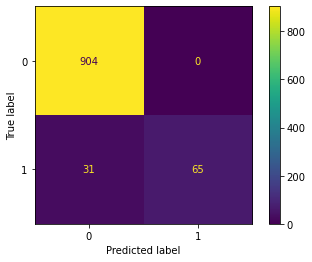

,Accuracy,precision,Recall,F1
0,0.969,1.0,0.677083,0.807453


In [215]:
gb_gs_test = evaluate_model(gb_gs_model, x2_test, y2_test)
gb_gs_test

- The accuracy remained similar at 97%, the precision increased to 100%, the recall reduced to 68% and the f1 reduced to 81%.

### Logistic Regression Model vs Decision Tree

The aim of this project was to optimise for precision.
- For the linear regression model, precision value for the initial model was 76%. Optimisation of the model using the C hyperparameter improved the precision to 79%, while optimisation by increasing the threshold to 0.57, gave a precision of 87%

- The Decision Tree model had the precision value to be 85%. Prepruning with a max_depth of 4 and class_weight {0: 0.096, 1:0.904} gave a precision of 68% which was a reduction. Optimisation with a threshold value of 0.63 resulted in a precision of 94%.  

The ensemble methods performed better for the treebased models. 
- Random Forest had a precision of 96%, and optimisation using the hyperparameter tuning technique gave a precision of 100%. This came at the expense of a very low recall (19%) and f1 value (33%)

- Gradient Boosting had an initial precsision of 96% and optimisation using the hyperparameter tuning technique gave a precision of 98% with a better value for recall (74%) and f1 (84%).

In summary, the Decision Tree model and other ensemble methods outperformed the Linear Regression model. 

The model with the best performance on the test data for the recall, taking into consideration trade offs for other metrics was the optimised Gradient Boosting model.

### Recommendations

- The recommended model is the Gradient Boosting model which has been optimised for precision. It gives an overall best performance for the precision for the training, validation and test data, compared to the other models, and does not compromise so much on the other metrics.

The most significant variables observed in all tree-based models include:
- Income
- Family
- CCAvg (Average monthly spending on credit card)
- CD Account

The higher a customer earns, the more the customer has to spend on his/her credit card.  

It also seems to be the case that customers with higher number of family members tend to spend more and as a result may be open to obtaining the loan.  

Customers with an existing Deposit account are also more likely to take up the loan which could be as a result of trust and confidence in the products and services offered by the bank.

In light of the above, it is recommended that the marketing team target:
- Higher earning customers
- Customers who have a large family
- Customers who spend more monthly on their credit cards
- Customers with an existing deposit account 
- Customers with a combination of all 4 of these attributes will most likely take up the loan.